<a href="https://colab.research.google.com/github/adinsa1/Data110/blob/main/201Probability_Distributions__2__(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Module scipy.stats

Statistical functions (scipy.stats)
This module contains a large number of probability distributions as well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of rv_continuous (rv_discrete for discrete distributions).

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)



In [ ]:
## Density function

from scipy.stats import norm
norm.pdf(0) # same as dnorm(0) in R: density

0.3989422804014327

Single variable Normal (Gaussian) distribution
f(x) is the density function; it is not the probability of x

<img src= "https://i.stack.imgur.com/oXbxu.jpg">

In [ ]:
norm.ppf(0.5) # quantile (percent point) function same as qnorm(0.5) in R. Find x such that P(X<=x) = 0.5 --> x = 0

0.0

<img src='https://online.stat.psu.edu/stat500/sites/stat500/files/inline-images/500%20l1%20median%2050th.png' >

In [ ]:
## Cumulative distribution function:   cdf(x, loc=0, scale=1)

norm.cdf(0) # same as pnorm(0) in R. This means P(X<=0) = 0.5

0.5

In [ ]:
# Random variates (numbers):  rvs(loc=0, scale=1, size=1, random_state=None), loc is mean and scale is standard deviation

norm.rvs(size=3) # same as rnorm(3) in R


array([-1.53858354, -1.57394259,  0.68574821])

In [ ]:
# mean = 100, standard devaition 15

norm.pdf(120, loc = 100, scale = 15)


0.010934004978399577

In [ ]:
norm.rvs(100,15,3)


array([112.16655569, 107.71699126,  93.00173736])

In [ ]:
# Density function: f(0) and f(1)
x = [0,1]
norm.pdf(x) ## instead of looping over the list: norm.pdf(0), norm.pdf(1)

array([0.39894228, 0.24197072])

In [ ]:
norm.cdf(x)   # cumulative distribution 1D gaussian; x=[0,1] is considered as x = 0, x=1 --> norm.cdf(0) and norm.cdf(1)

array([0.5       , 0.84134475])

In [ ]:
# Multivariate is same as single variate norm.pdf if no vector of means and cov are provided
from scipy.stats import multivariate_normal
multivariate_normal.pdf(x) # x contains two points in a one-dimensional gaussian

array([0.39894228, 0.24197072])

In [ ]:
# instantiate a normal multivariate and assign to a variable var1
var = multivariate_normal()
var.rvs()  # generate one random sample from one-dim gaussian distribution

0.31382500306661865

In [ ]:
## mean = [0,0] is the mean of a two dimensional variate. x=[0,1] is considered as a point in  2D
from scipy.stats import multivariate_normal
var1 = multivariate_normal(mean=[0,0], cov=1)
var1.pdf(x) # x contains one point in a two-dim gaussian

0.09653235263005393

<img src = 'https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/Multivariate_Gaussian.png/600px-Multivariate_Gaussian.png' >

In [ ]:
var1.rvs() # generate one random sample from 2D gaussian

array([-1.66943151,  1.76421625])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# random numbers from a Bernoulli distribution (binary outcome) e.g., tossing a  coin heads/tails 10 times

 # 0-------------p--1
                                 #.....
def bern(p):
  r = np.random.uniform(0,1)
  if r < p:
    return 1
  else:
    return 0

size = 10
for i in range(size):
  coin = bern(0.5)  # fair coin
  print(coin)

1
0
0
1
1
1
0
0
0
0



<img src='https://web.mit.edu/urban_or_book/www/book/chapter7/images7/fig7.2.gif'>

In [ ]:
from scipy.stats import bernoulli
size = 10
for i in range(size):
  coin = bernoulli.rvs(0.5)  # fair coin
  print(coin)

1
1
0
0
1
0
0
1
0
1


In [ ]:
# Binomial distribution: binomial random variable is the number of heads or positives or successes x in n repeated trials of a binomial experiment
# Example: simulation of the number of heads and tails by tossing a fair coin 10 times
def bern(p):
  r = np.random.uniform(0,1)
  if r < p:
    return 1
  else:
    return 0

size = 10
x = [0,1]
y = [0,0]

for i in range(size):
  index = bern(0.5)
  y[index] +=1

print(y)



[6, 4]


<img src='https://www.onlinemathlearning.com/image-files/binomial-distribution-formula.png'>

<BarContainer object of 2 artists>

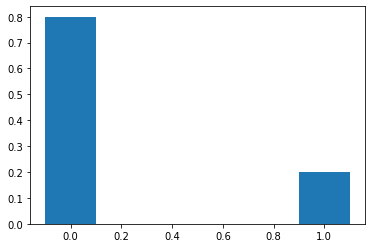

In [ ]:
import matplotlib.pyplot as plt
y[0] = y[0]/size
y[1] = y[1]/size
plt.bar(x,y, 0.2)

In [ ]:
# Bernoulli as a special case of Binomial                     1001111000 -> 5      9
                                                              1110000001-> 4       8
from scipy.stats import binom

size = 10
for i in range(size):
  coin = binom.rvs(1,0.5, size=1)  # fair coin
  print(coin)

[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]


In [ ]:
binom.rvs(10,0.5, size=1)        #.

array([8])

In [ ]:
binom.ppf(0.5, n=10, p=0.5)

5.0

In [ ]:
prob= binom.cdf(5, n=10, p=0.5)
print(prob)
np.allclose(5, binom.ppf(prob, n=10, p=0.5))

0.6230468749999999


True

In [ ]:
binom.pmf(5, n=10, p=0.5)

0.24609375000000025

In [ ]:
binom.cdf(5, n=10, p=0.5) - binom.cdf(4, n=10, p=0.5)

0.24609374999999978

In [ ]:
from scipy.stats import norm
norm.cdf(5.5, loc= 5, scale=(0.5)*(10**(0.5)) ) - norm.cdf(4.5, loc= 5, scale=(0.5)*(10**(0.5)) )

0.24817036595415076

In [ ]:
# Categorical variable with more than two outcomes

# Example: random outcomes of a die tossed 10 times

# 0-------p1--p1+p2------p1+p2+p3-------p1+p2+p3+p4----p1+p2+p3+p4+p5------1

def categ(p1,p2,p3,p4,p5,p6):
  r = np.random.uniform(0,1)
  if r < p1:
    return 1
  elif r < p1 + p2:
    return 2
  elif r < p1 + p2 + p3:
    return 3
  elif r < p1 + p2 + p3 + p4:
    return 4
  elif r < p1 + p2 + p3 + p4 + p5:
    return 5
  else: return 6

size = 10
for i in range(size):
  dice = categ(1/6,1/6, 1/6, 1/6, 1/6, 1/6)  # fair die
  print(dice)



3
1
1
3
5
1
2
6
2
2


In [ ]:
# Multinomial distribution is the equivalent of the binomial distribution when the categorical variable has more than two outcomes
# Example: Simulation of the number  of times each side of a fair die shows up if the die is tossed 10 times


y = [0,0,0,0,0,0,0] # initialize count to zero
size = 10

for i in range(size):
  dice = categ(1/6,1/6, 1/6, 1/6, 1/6, 1/6)
  y[dice] += 1

print(y[1:])





[2, 1, 3, 1, 2, 1]


<BarContainer object of 6 artists>

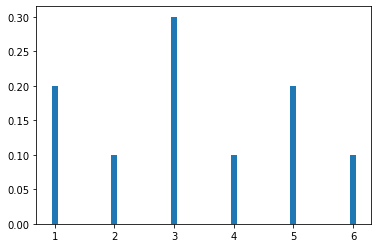

In [ ]:
x = [1,2,3,4,5,6] # points on x-coordinate

y[1] = y[1]/size
y[2] = y[2]/size
y[3] = y[3]/size
y[4] = y[4]/size
y[5] = y[5]/size
y[6] = y[6]/size

y[1:]
plt.bar(x,y[1:], 0.1)

Using Numpy

In [ ]:
# Using numpy to simulate random outcomes of a die tossed 10 times
die_1 = np.random.choice( a=[1, 2, 3,4,5,6],  size=10,  p=[1/6, 1/6, 1/6, 1/6, 1/6,1/6]  )
die_1

array([6, 1, 6, 3, 4, 4, 4, 5, 3, 4])

In [ ]:
# Using numpy generate samples from a multinomial distribution, i.e.,
# the number  of times each side of a fair die shows up if the die is tossed 10 times
np.random.multinomial(10, [1/6, 1/6, 1/6, 1/6, 1/6,1/6])

array([5, 1, 0, 2, 2, 0])

Probability of multinomial distribution

<img src='https://www.statisticshowto.com/wp-content/uploads/2015/05/multinomial-formula-2.png'>

### Summary

Bernoulli has two outcomes, e.g., Success(1) with probaility p and Failure(0) with probabilty 1- p.

Binomial is about the count of number of successes in N trials. It is the sum of the Bernoullis (ones and zeros)

Categorical has more than two discrete outcomes with probabilities p1, p2, p3, ....

Multinomial is about the count of each category.

Bernoulli is a special case of categorical

Binomial is a special case of multinomial

[GitHub ThinkX](https://github.com/AllenDowney/ThinkX)

In [ ]:
import random
!pip install ThinkX #thinkstats2


     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for ThinkX: filename=thinkx-1.1.3-cp36-none-any.whl size=59943 sha256=1c5b7a58ff7fc84021d9961a4035541482aafebbaf5c471a16d58aea87bc1a0f
  Stored in directory: /root/.cache/pip/wheels/74/e9/57/f4ad676ba30144b574a6cc36606e82874f8aac8271112f1cd3
Successfully built ThinkX


In [ ]:
import thinkstats2
import thinkplot

**Hypothesis testing**

Reference: Chapter 9 of [ThinkStats2](http://greenteapress.com/thinkstats2/thinkstats2.pdf)

The following is a version of thinkstats2.HypothesisTest with just the essential methods:

In [ ]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel())
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

And here's an example that uses it to compute the p-value of an experiment where we toss a coin 250 times and get 140 heads.


Sample:
         
         Heads    Tails    Absolute difference         
         140      110          30
Actual difference: self.actual = 30

Model (Null Hypothesis): A fair coin has absolute difference of almost zero.

Simulate 1000 times. Each time toss the coin 250 times and calculate the absolute difference

      Heads    Tails    Absolute difference         
         130      120          10
         127      123          4
         145      105          40 -----> 40 = x >= self.actual = 30
         135      115          20
         ...      ...          ...
         ...      ...          ...
How many times (out of 1000 simulations) do we get absolute differences greater (more extreme) or equal to the sample absolute difference of 30?  

It turns out 72 times out of 1000.         

In [ ]:
class CoinTest(HypothesisTest):

    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

The p-value turns out to be about 7%, which is considered on the border of statistical significance.

In [ ]:
ct = CoinTest((140, 110))
pvalue = ct.PValue()
pvalue



0.069

In [ ]:
from scipy.stats import binom

 binom.cdf()

### Entropy (Physics)
Entropy is often interpreted as the degree of disorder or randomness in the system.

How many ways can I get 4 heads ("order") if I toss a fair coin 4 times?
 HHHH --> only one way. Probabilty = 1/16

How many ways can I get 2 heads and 2 tails ("disorder", "messy") if I toss to a fair coin 4 times?
 HHTT, HTHT, TTHH, THTH, HTTH, THHT --> 6 ways. Probability = 6/16

 There are more ways to have "disorder" than "order". The increase of entropy in the universe is statistical,i.e., disorder is more probable than order. It explains the arrow of time (past, present, future). Why do we grow old but not get younger? Why do we remember the past but not the future?

 Life struggles against entropy to maintain existence but increases the overall entropy of the universe by consuming and wasting energy.





<img src='https://image.slidesharecdn.com/time-pop-11-120918154634-phpapp02/95/the-origin-of-the-universe-and-the-arrow-of-time-20-728.jpg'>

Is the meaning of life to speed up the entropy ("disorder") of the universe?

<img src='https://image.slidesharecdn.com/time-pop-11-120918154634-phpapp02/95/the-origin-of-the-universe-and-the-arrow-of-time-16-728.jpg?cb=1347984480'>

### Information Entropy
The information content of an event E is defined as ${\displaystyle I(E)=-\log _{2}(p(E))}$ or ${\displaystyle I(E)=\log _{2}(1/p(E))}$
where $p(E)$ is the probability of the event. The more surprising an event is (low probability), the more info content.

Claude Shannon (1916 – 2001), mathematician, electrical engineer, cryptographer

<img src='https://i.ytimg.com/vi/z2Whj_nL-x8/hqdefault.jpg'>

John Wheeler (1911 – 2008) , theoretical physicist

<img src='https://i.ytimg.com/vi/6qMi0K6hlYA/hqdefault.jpg'>

In [ ]:
# Fair coin
from math import log2
p = 0.5
# info content of heads is one bit
I = -log2(p)
I

1.0

Let Heads  = 1 and Tails = 0. Then each side can be represented by one bit.

` 1 `

` 0 `






In [ ]:
# Fair die
p = 1/6
# info content of rolling 5 is 2.858 bits
I = -log2(p)
I

2.584962500721156


Each side of the die can be represented by 3 bits:

` 0 0 1  `   ----> 1     
` 0 1 0  `   -----> 2  
` 0 1 1  `   ------>3    
` 1 0 0  `  ------>4    
` 1 0 1  `    ---->5   
` 1 1 0  `    ----->6

  Shannon's formula says we can do better, in principle. Each side of the die can be represented by 2.58 bits. Obviously, we haven't used `000` and `111` in the 3 bit representation.

Information theory defines the entropy $H$ of a random variable as the average info content of the variable's possible outcomes.
$H(X)=E(I(X))=E(-\log(P(X))$,
where $\operatorname {E}$ is the expected value or average of a variable.
For a discrete random variable:
${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{2}\mathrm {P} (x_{i})}}$





In [ ]:
# For a fair die
p=1/6
H = -sum([p * log2(p) for _ in range(6)])
H

2.584962500721156

In [ ]:
# For a fair English alphabet
p=1/26
H = -sum([p * log2(p) for _ in range(26)])
H

4.70043971814109

### Intuition:
The quantity of information is the number of bits required to send a random event from a probability distribution. It is also considered to measure "Surprise".  An event with high probability has less surprise, less entropy, less info, e.g., the Sun rose from the east this morning.
An event with low probability surprises us; it has more info, more entropy, e.g., Breaking News: MC decided to ban all homework.

### Using the library scipy.stats

In [ ]:
# Fair die

from scipy.stats import entropy

p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
# Entropy
H = entropy(p, base=2)
H

2.584962500721156

### Relative entropy or Kullback-Leibler divergence
Average number of extra bits to represent an event from distribution q instead of distribution p.

In [ ]:
print(entropy([1/2, 1/2], qk=[9/10, 1/10]))
entropy([3/4, 1/4], qk=[1/2, 1/2], base=2)

0.5108256237659907


0.18872187554086714

### Cross-Entropy
Average number of total bits to represent an event from distribution q instead of distribution P.

It is used as a loss function in  Machine Learning, e.g., Logistic Regression

In [ ]:
from math import log2

def CrossEntropy(p, q):
	return -sum([p[i]*log2(q[i]) for i in range(len(p))])

p = [1/2, 1/2]
q = [9/10, 1/10]

CrossEntropy(p, q)

1.736965594166206

## Bootstrapping
We have a sample data and want to infer about the parameter of a population.
This method resamples the sample data many times to simulate the sampling distribution. Resampling means sampling from the sample data with replacement.

Bootstrapping is a non-parametric method (no assumptions on distribution)


Bradley Efron published "Bootstrap methods: another look at the jackknife" (1979).
He received the International Prize in Statistics at the 2019 World Statistics Congress

<img src='https://newsroom.taylorandfrancisgroup.com/wp-content/uploads/2018/11/stat-award.png'>

In [ ]:
original_sample = np.random.random(100) # The sample is generated from uniform distribution
original_sample.mean()

0.5043061672886167

In [ ]:
means_boot_samples = []
for i in range(1000):
                boot_sample = np.random.choice(original_sample, 100)
                means_boot_samples.append(boot_sample.mean())

np.mean(means_boot_samples)




0.504311718651857

In [ ]:
conf_int = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int



array([0.44633398, 0.56302434])

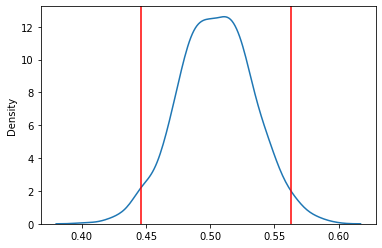

In [ ]:
import seaborn as sns
sns.kdeplot(means_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')



In [ ]:
from sklearn.utils import resample
means_boot_samples = []
for i in range(1000):
                boot_sample = resample(original_sample) # does bootstrap; replace = True
                means_boot_samples.append(boot_sample.mean())

np.mean(means_boot_samples)

0.5048773366337267